# Linear model for the minimum-variance control

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from HarrisWolpertandPursuit import MinimumVarianceControl, control_learning
m = MinimumVarianceControl(dt = 0.002, k = 0.0005, xT = np.array([10,0]), n_iter = 500000,record_each = 25000, eta=500000, v=0.)
u,record=control_learning(dt = 0.002, k = 0.0005, xT = np.array([10,0]), n_iter = 500000, record_each = 25000, eta=500000, v=0.)

In [3]:
from PlotFunctions import all_plots

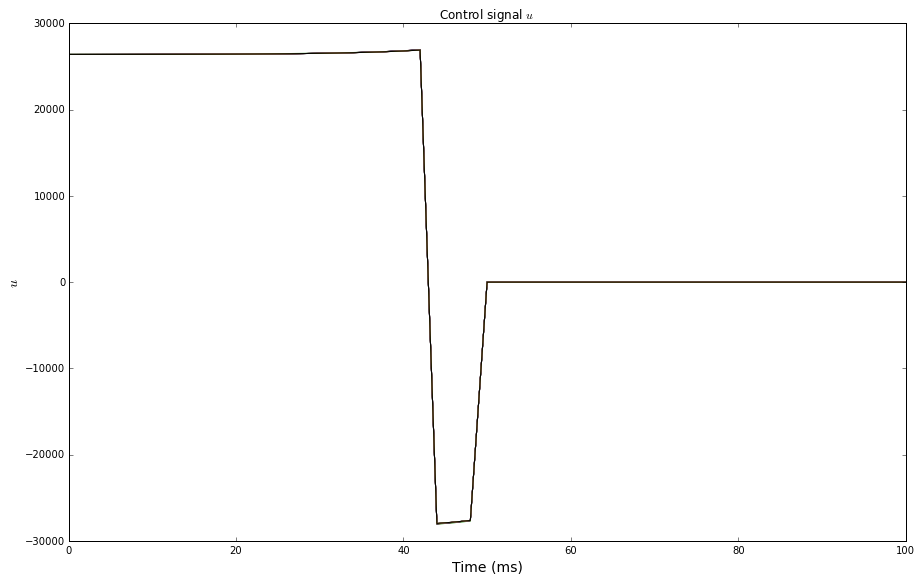

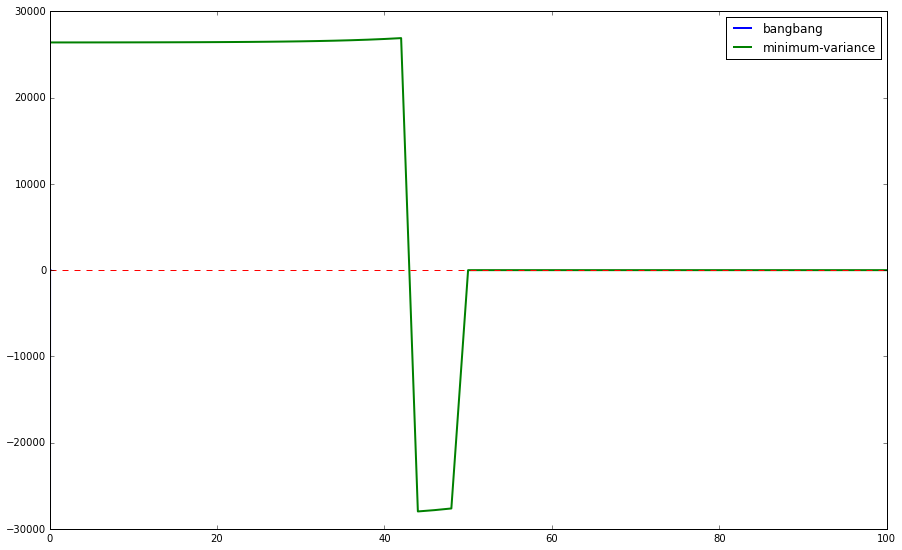

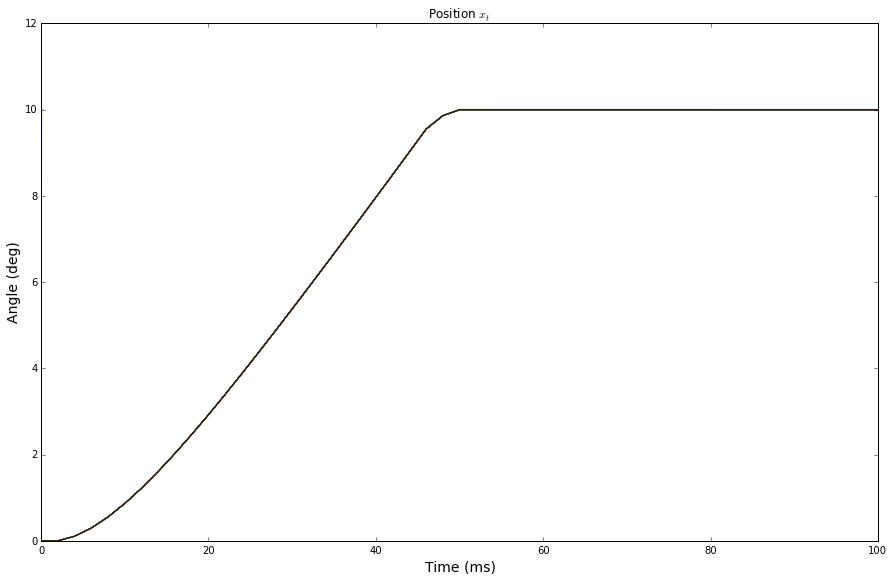

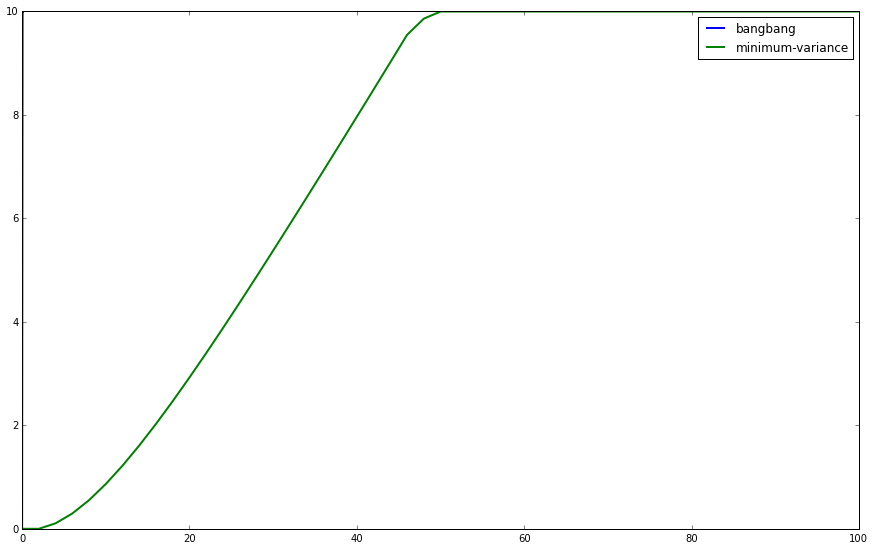

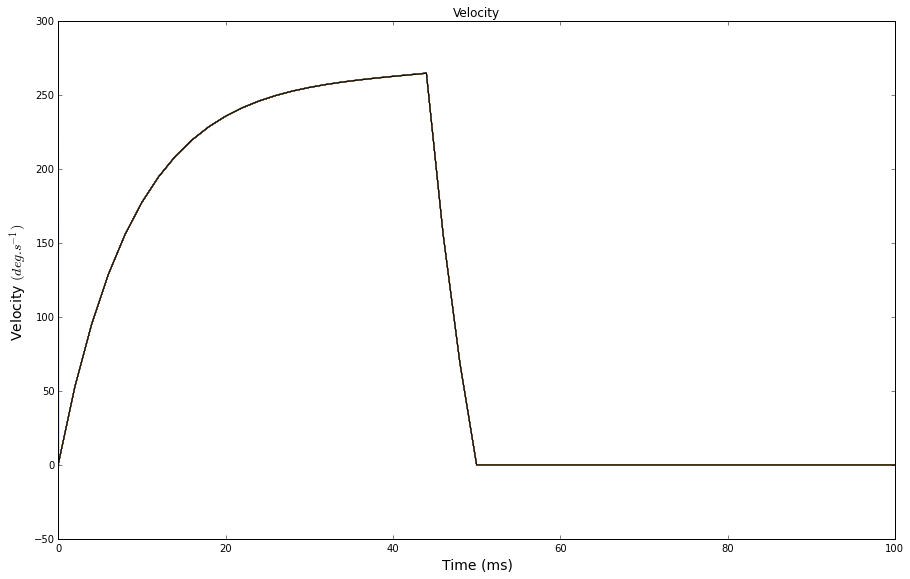

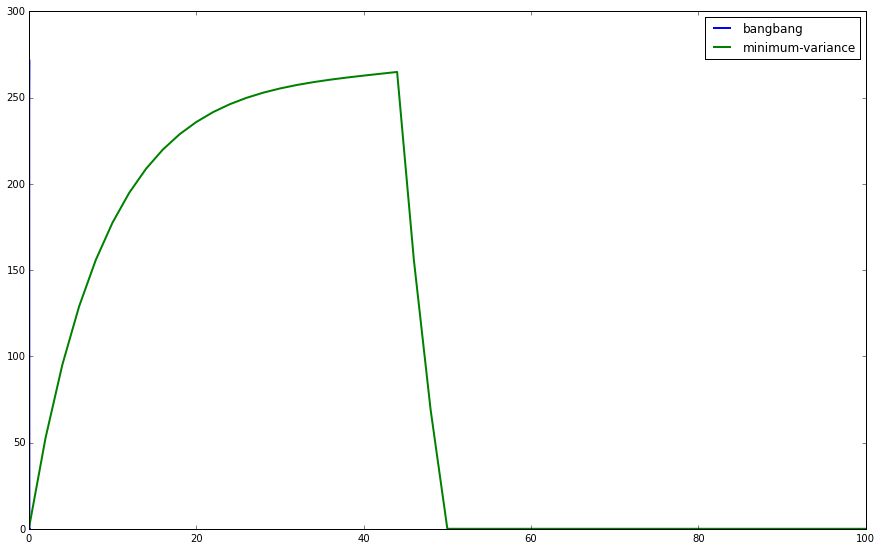

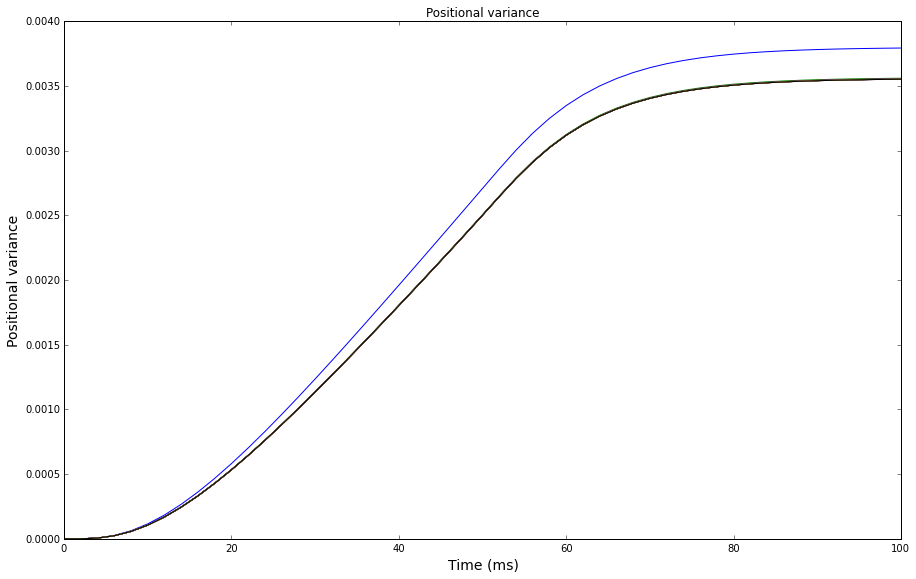

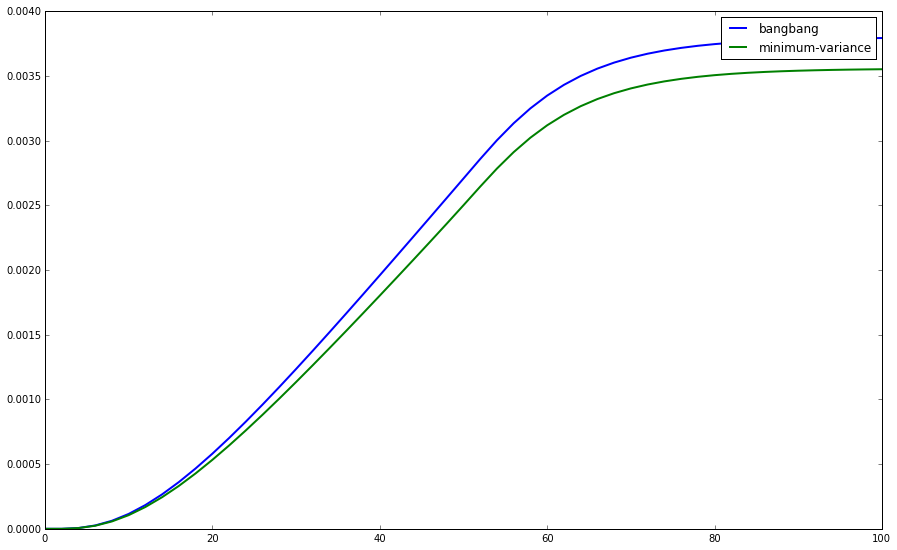

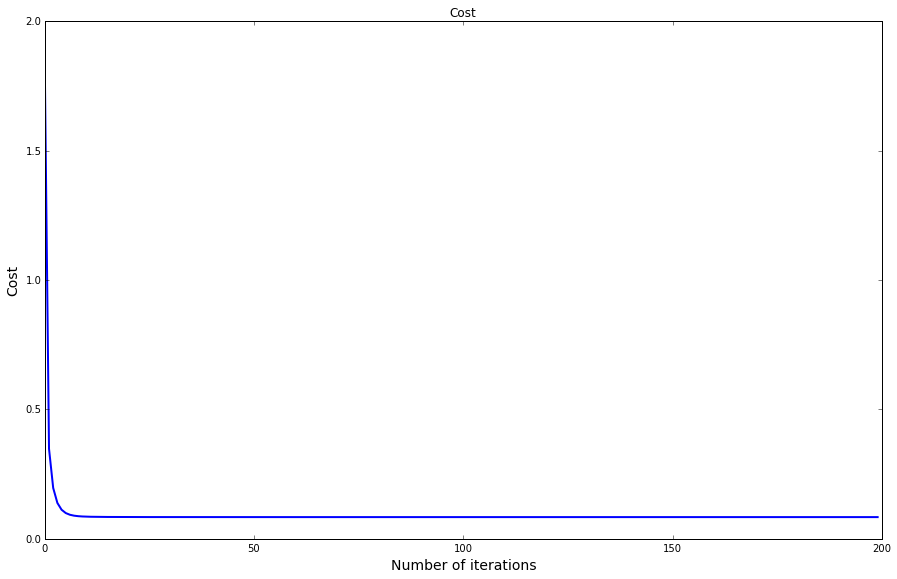

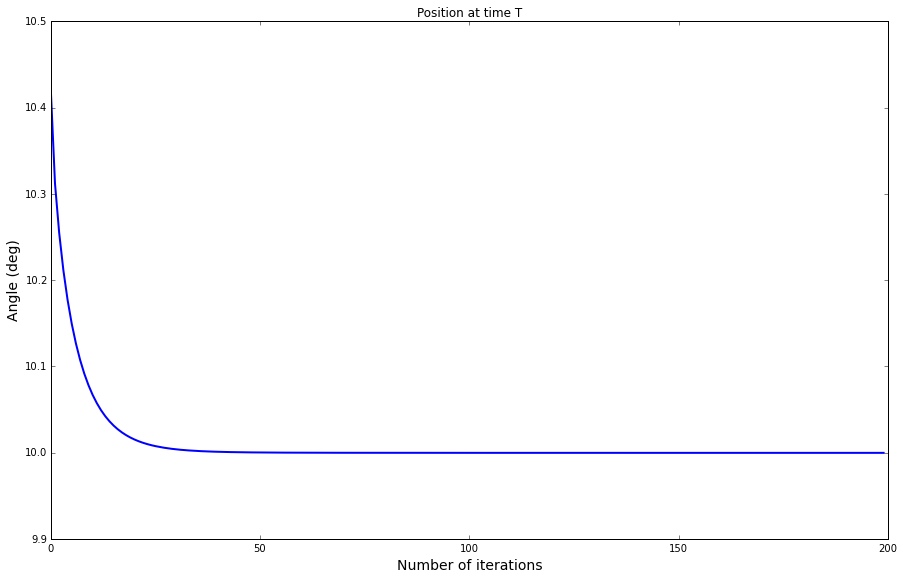

In [4]:
all_plots(record, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt, m.xT, m.v)

In [23]:
m = MinimumVarianceControl(dt = 0.0025, k = 0.0005, xT = np.array([10,0]), n_iter = 500000,record_each = 25000, eta=500000, v=10.)
u,record=control_learning(dt = 0.0025, k = 0.0005, xT = np.array([10,0]), n_iter = 500000, record_each = 25000, eta=500000, v=10.)

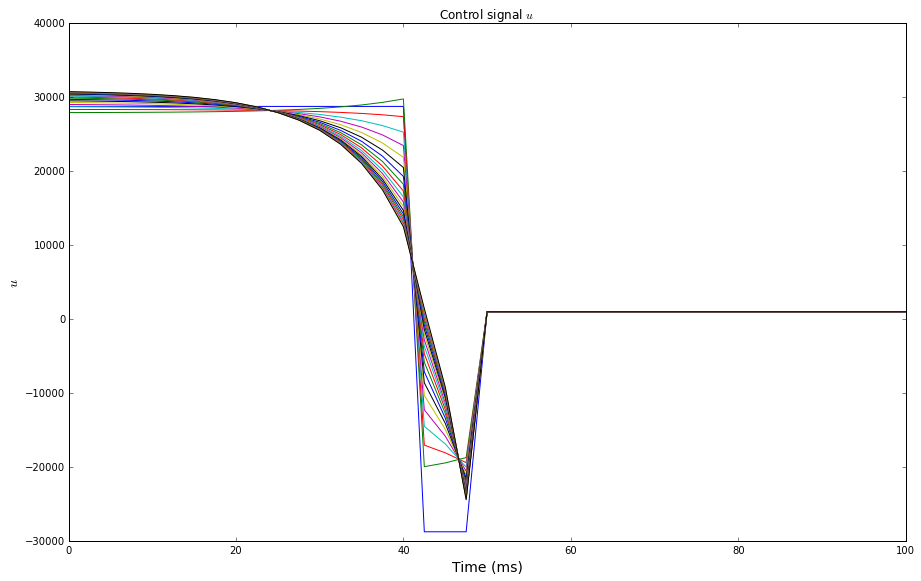

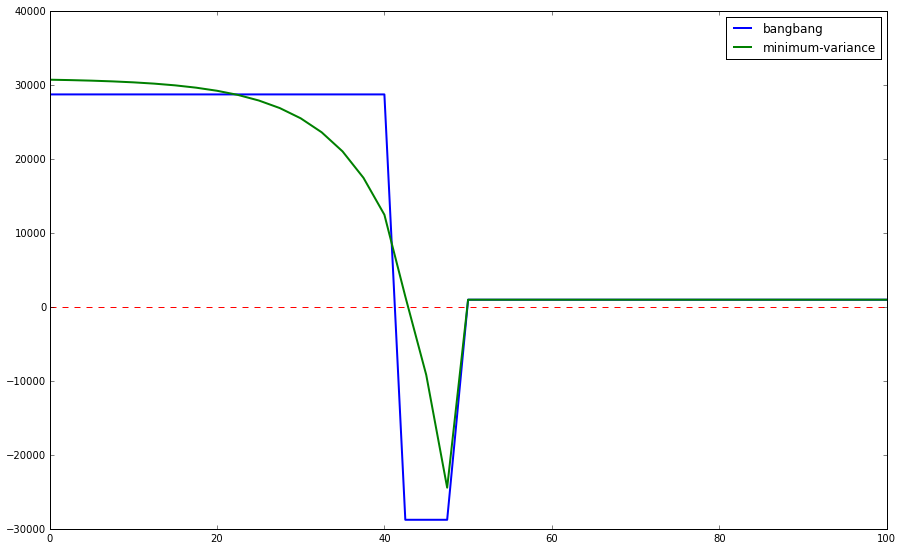

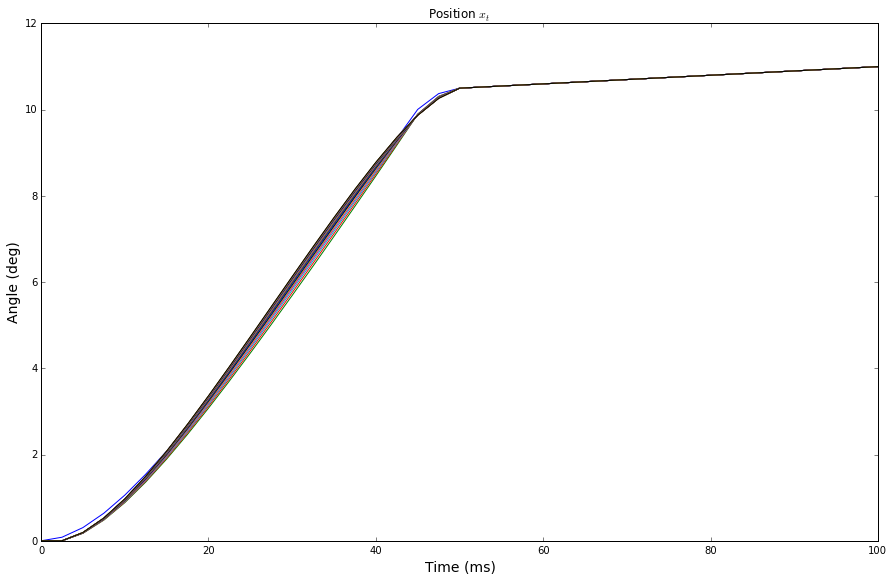

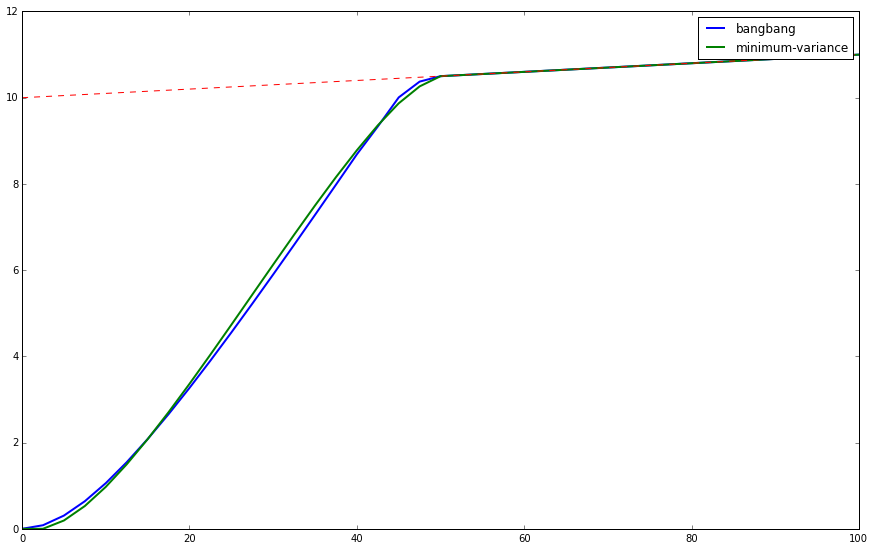

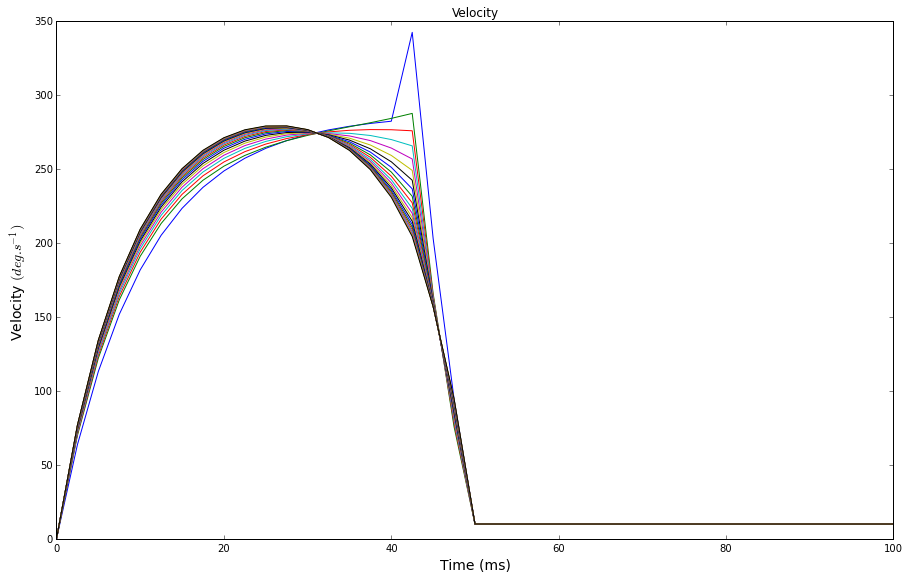

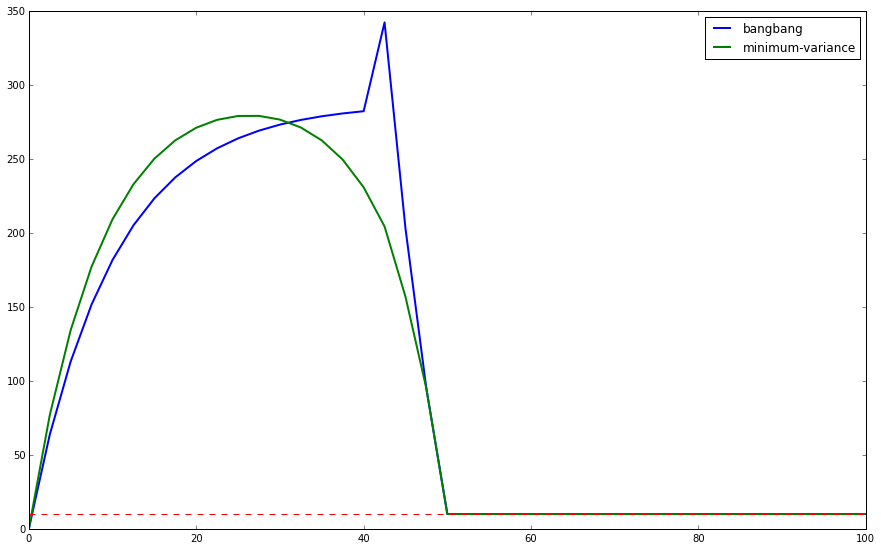

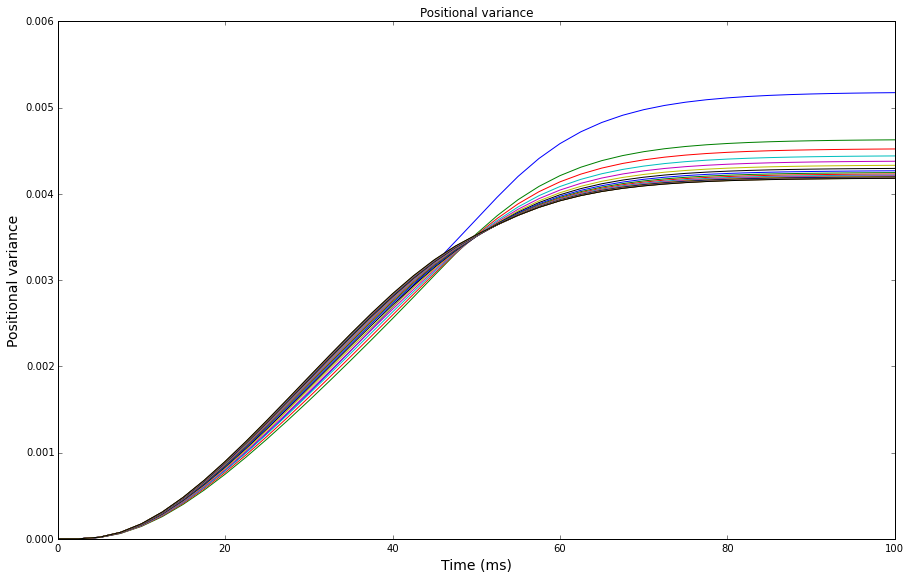

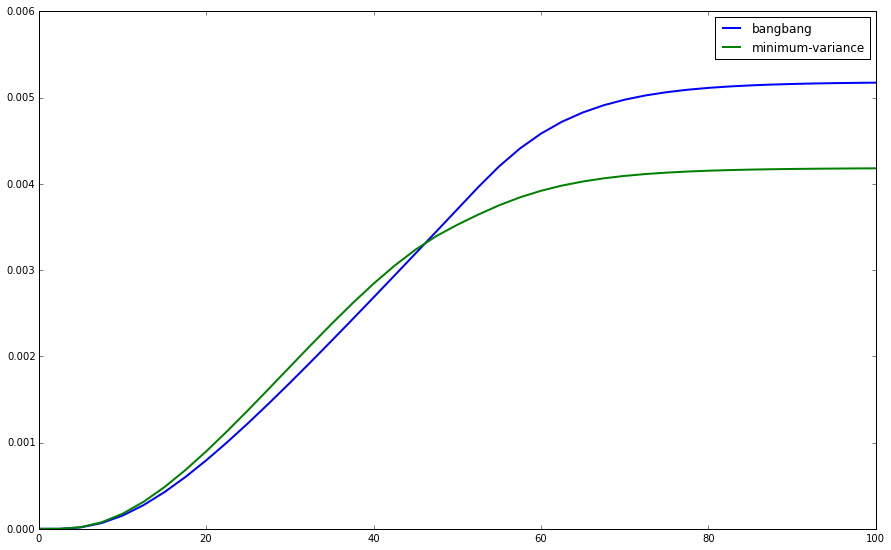

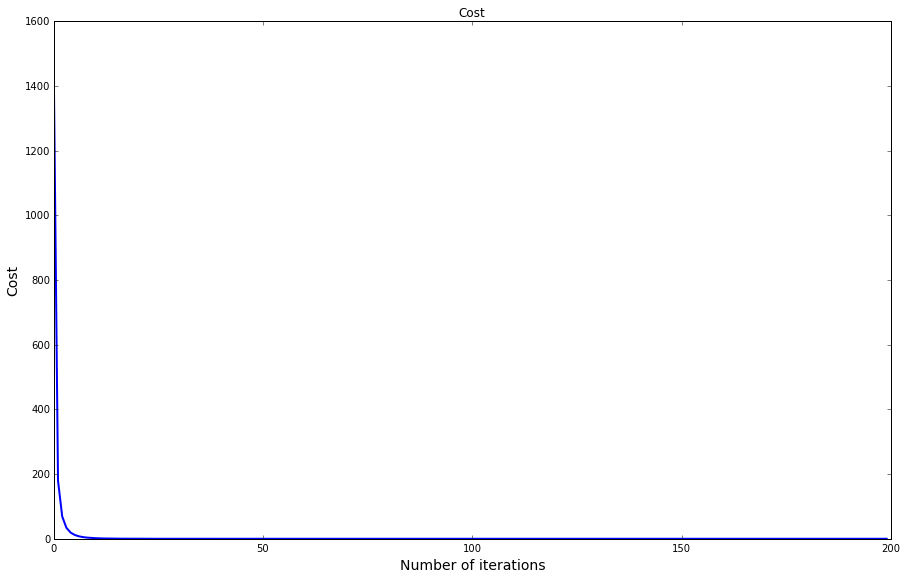

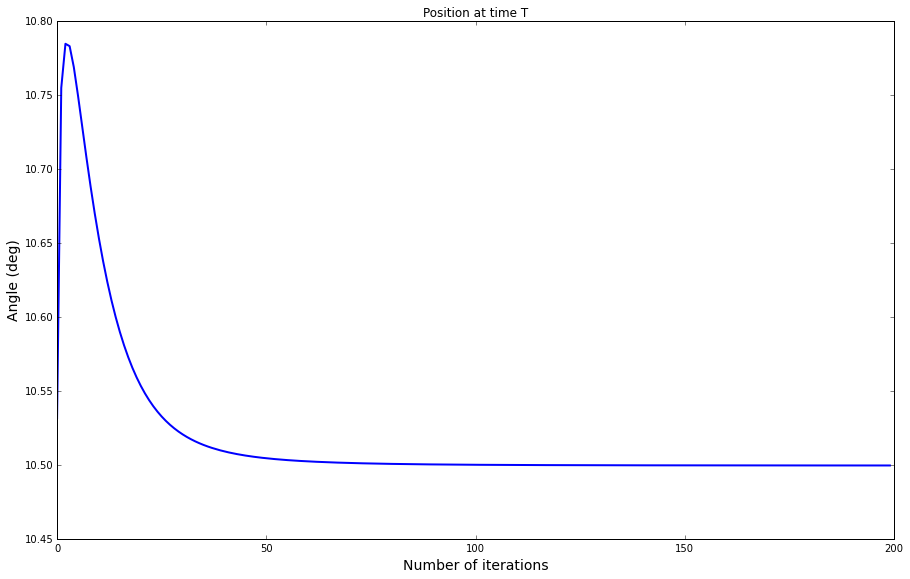

In [24]:
all_plots(record, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt, m.xT, m.v)

In [25]:
m = MinimumVarianceControl(dt = 0.0025, k = 0.0005, xT = np.array([10,0]), n_iter = 500000,record_each = 25000, eta=800000, v=20.)
u,record=control_learning(dt = 0.0025, k = 0.0005, xT = np.array([10,0]), n_iter = 500000, record_each = 25000, eta=800000, v=20.)

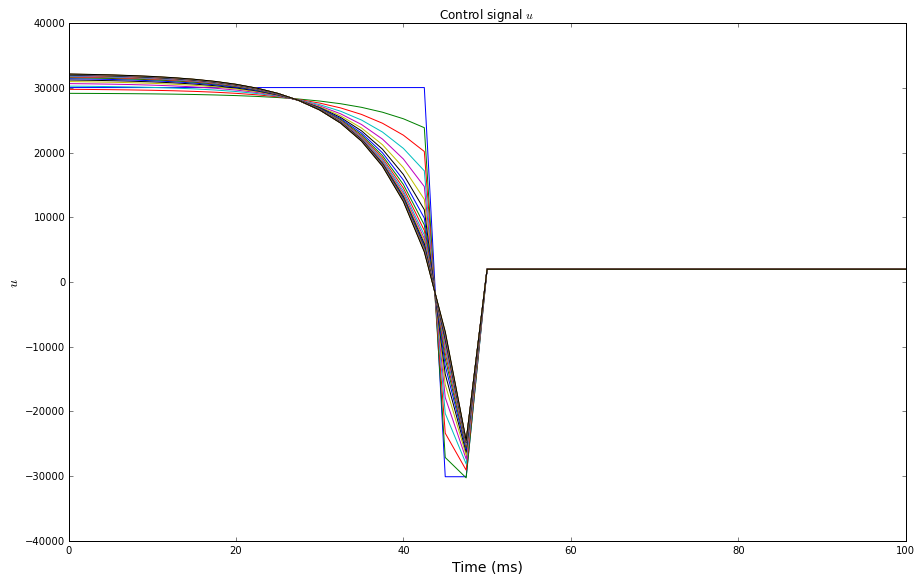

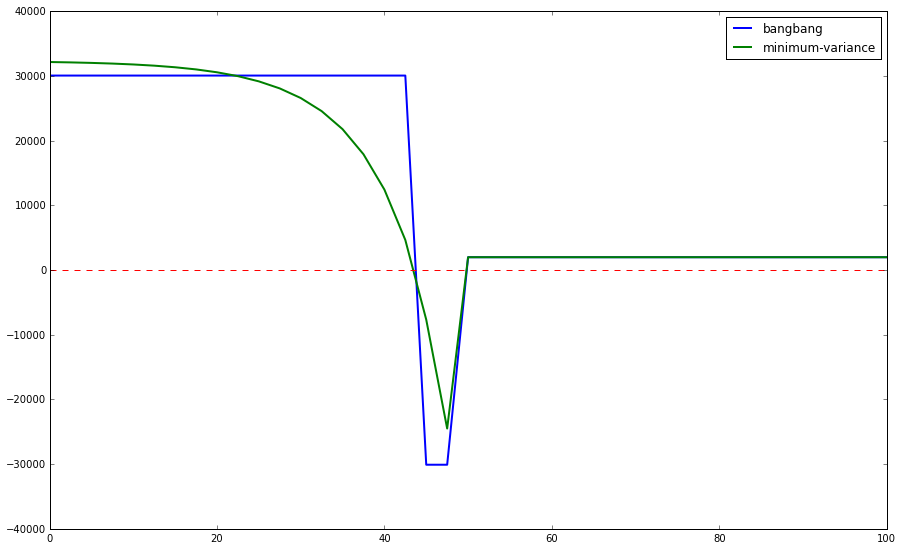

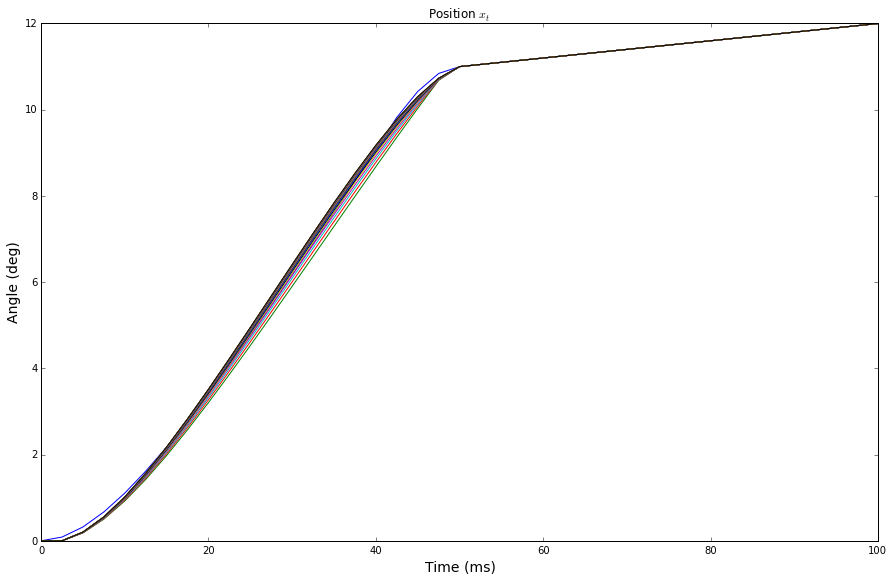

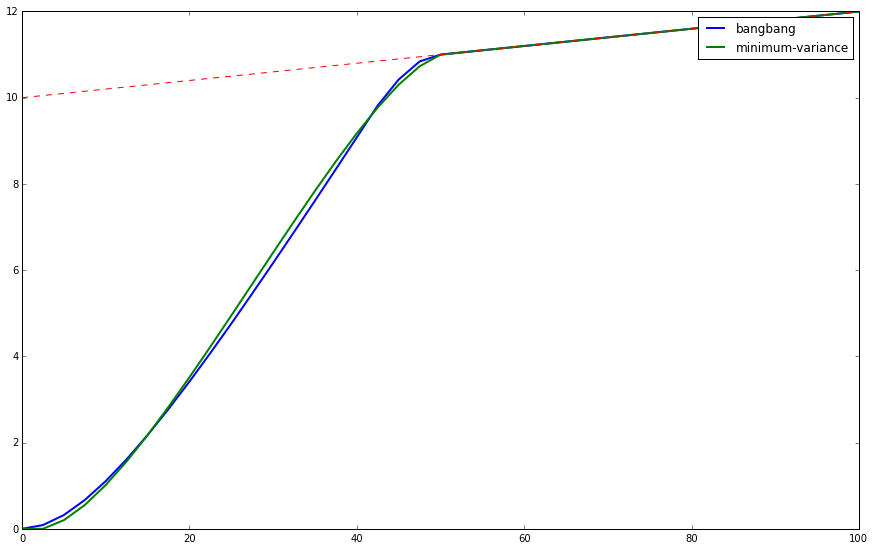

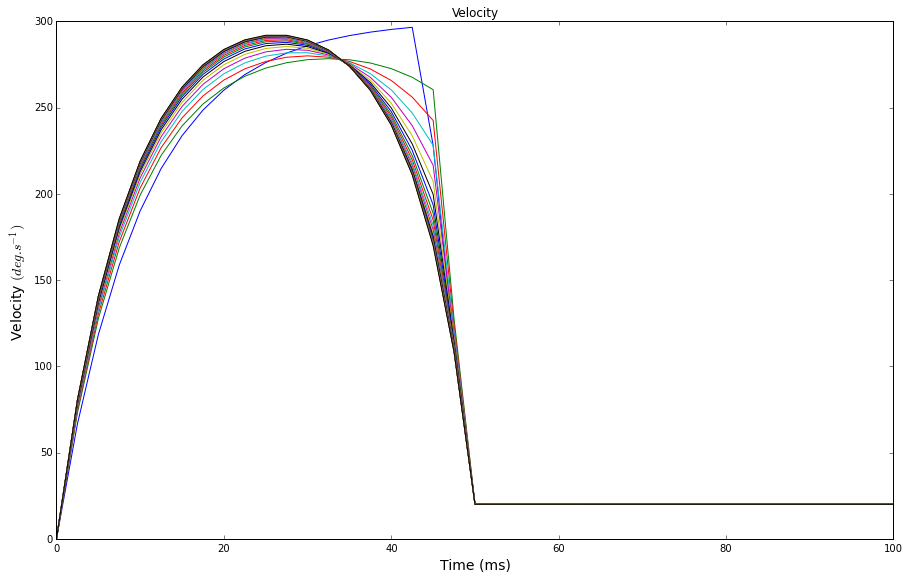

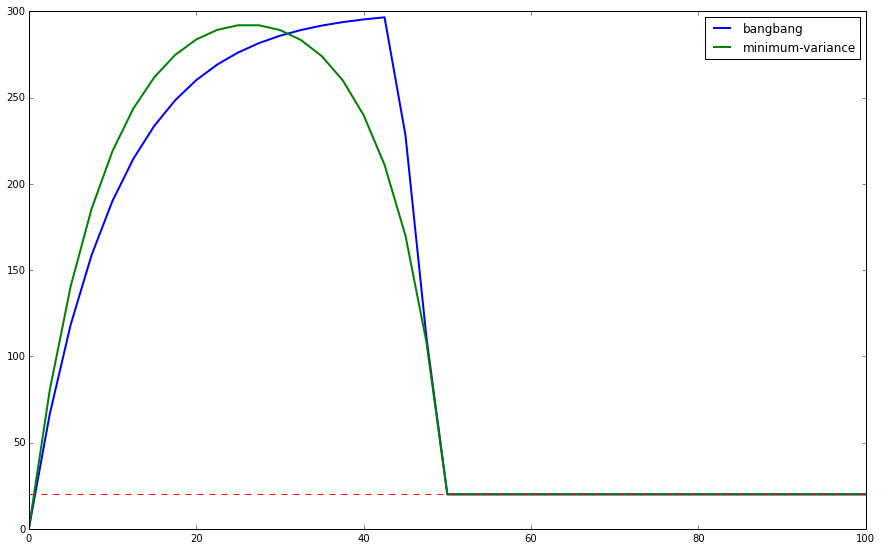

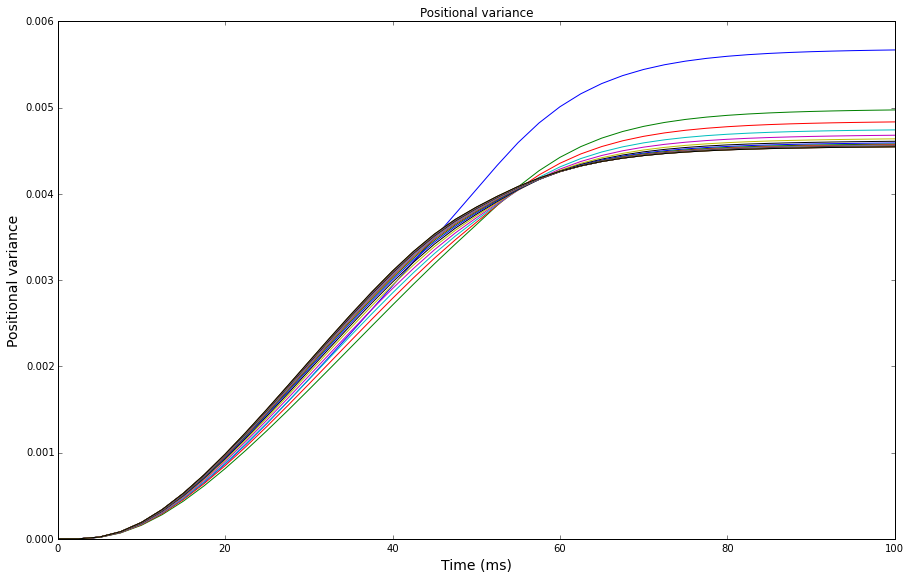

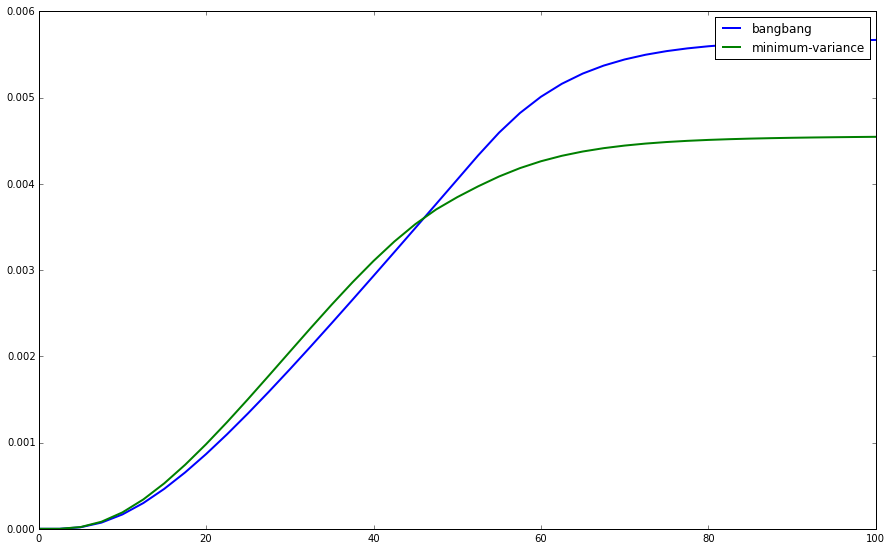

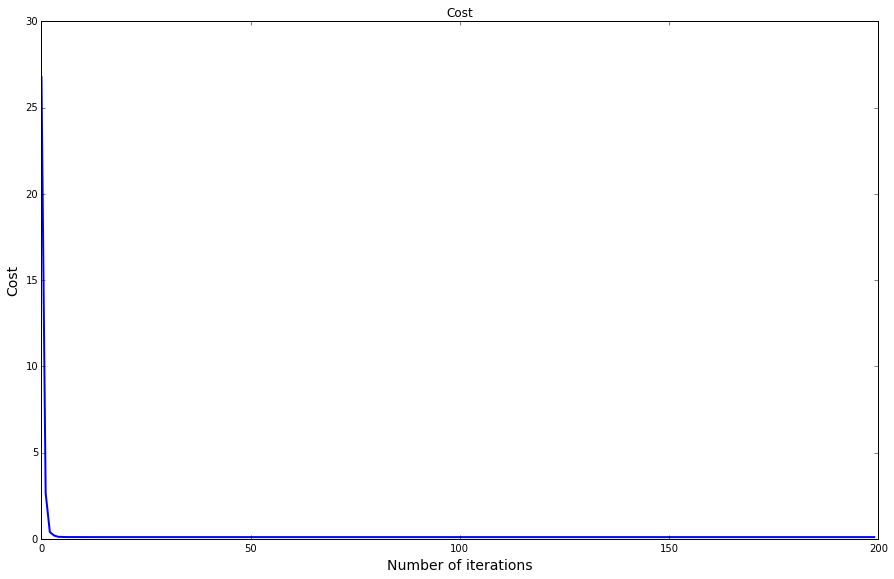

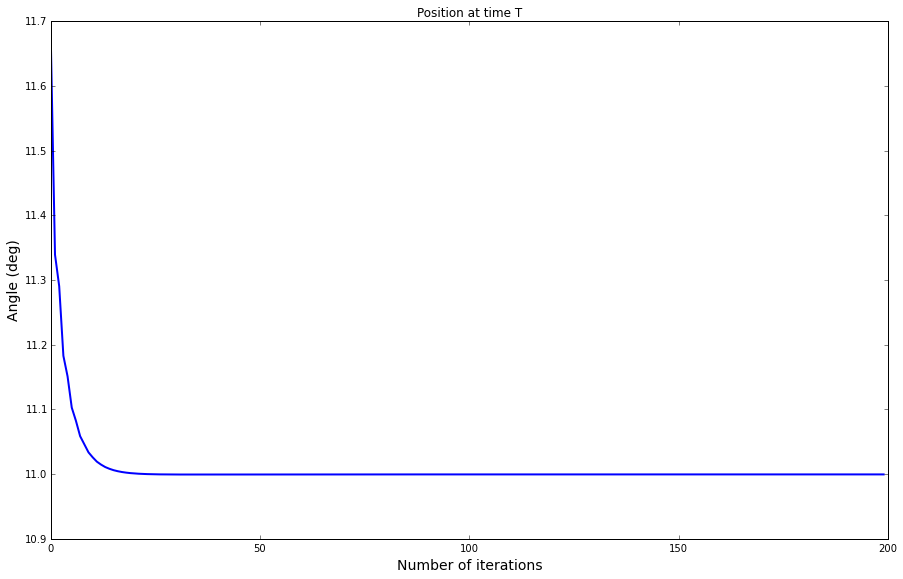

In [26]:
all_plots(record, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt, m.xT, m.v)

In [27]:
m = MinimumVarianceControl(dt = 0.0025, k = 0.0005, xT = np.array([10,0]), n_iter = 500000,record_each = 25000, eta=800000, v=30.)
u,record=control_learning(dt = 0.0025, k = 0.0005, xT = np.array([10,0]), n_iter = 500000, record_each = 25000, eta=800000, v=30.)

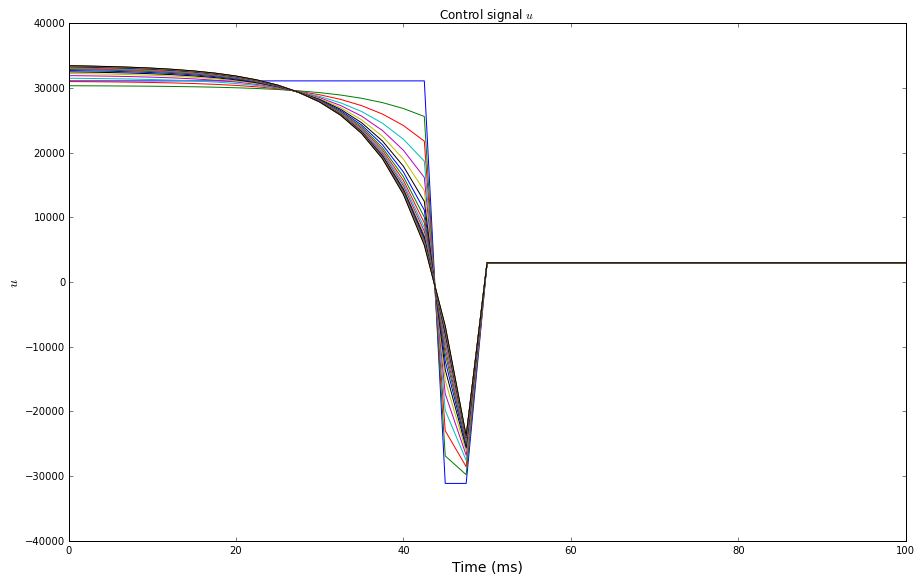

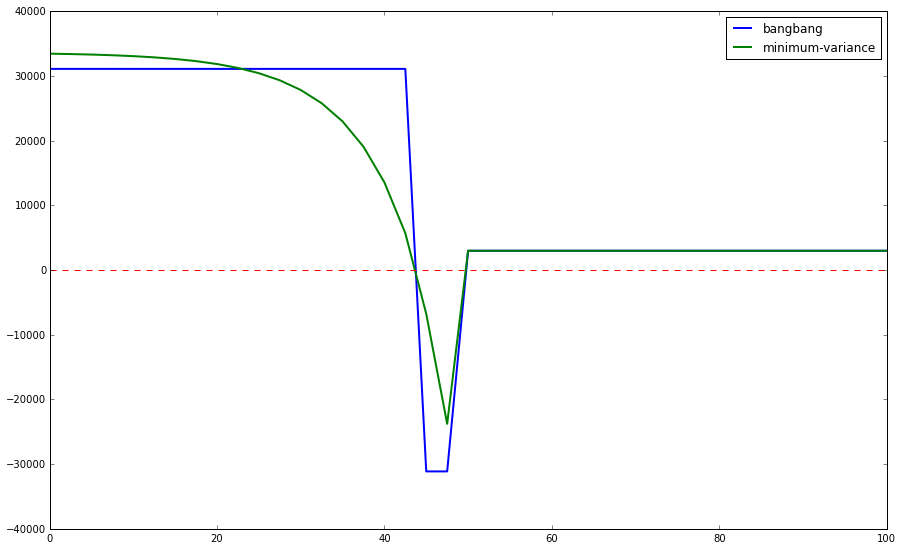

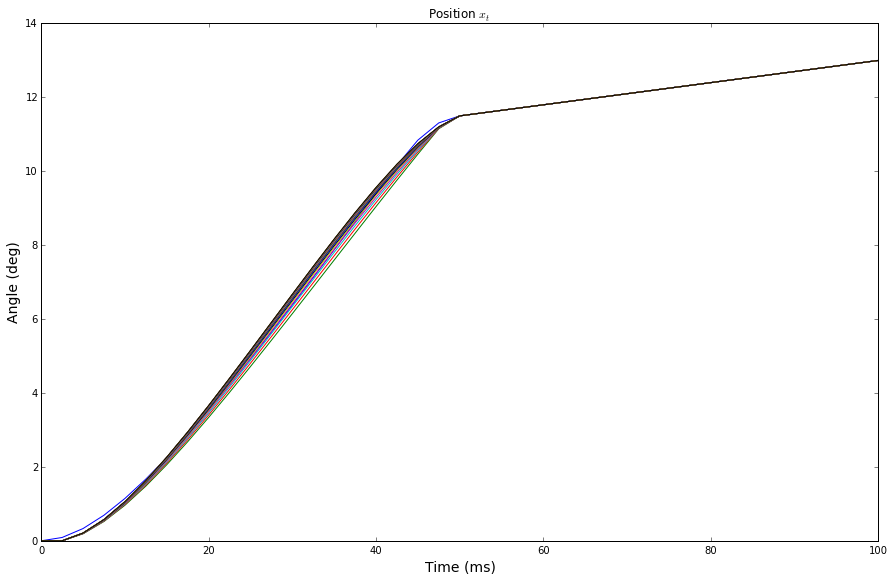

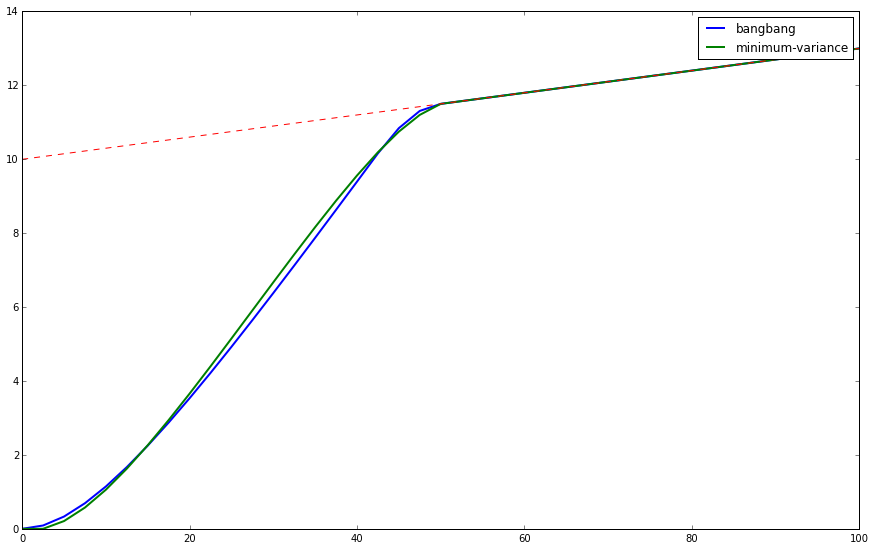

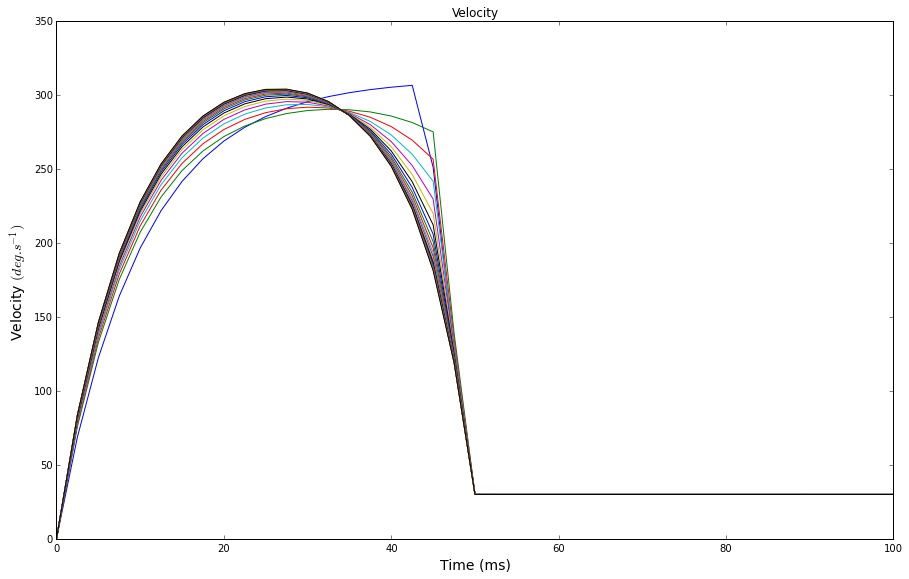

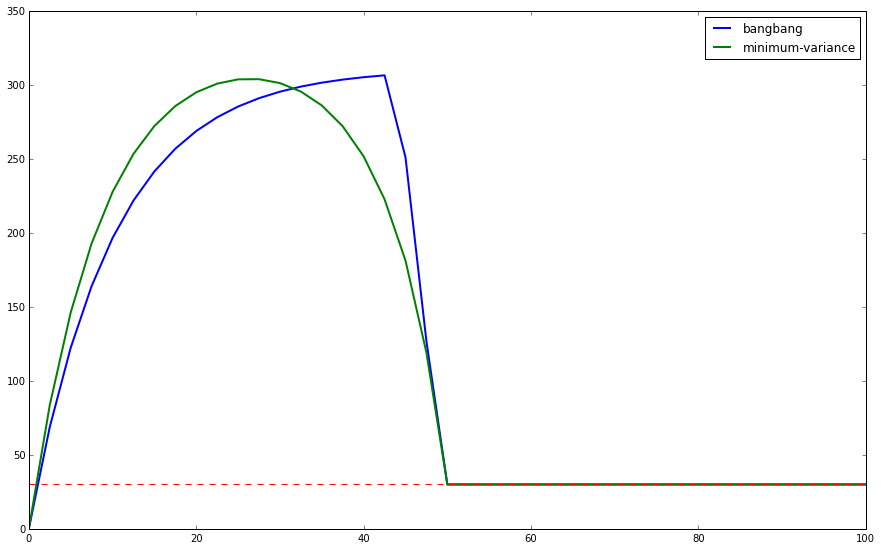

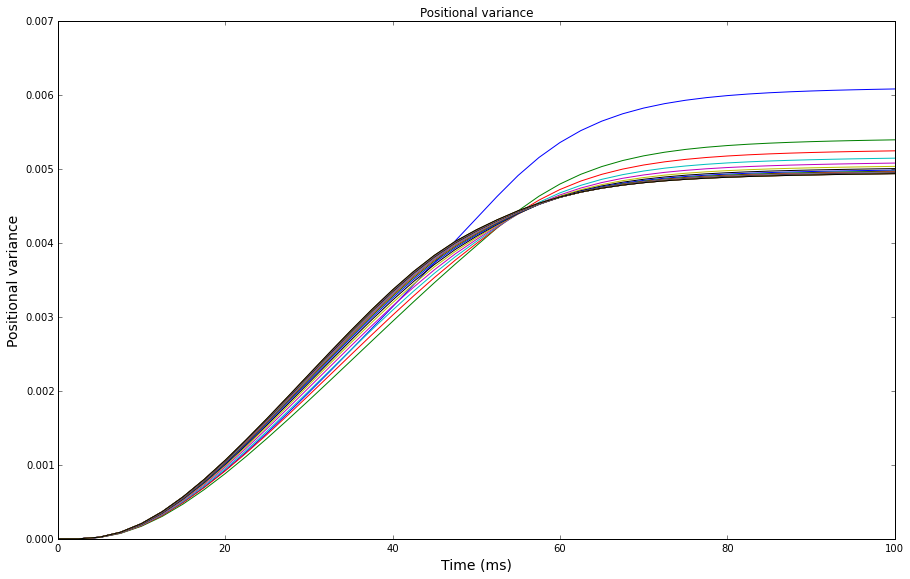

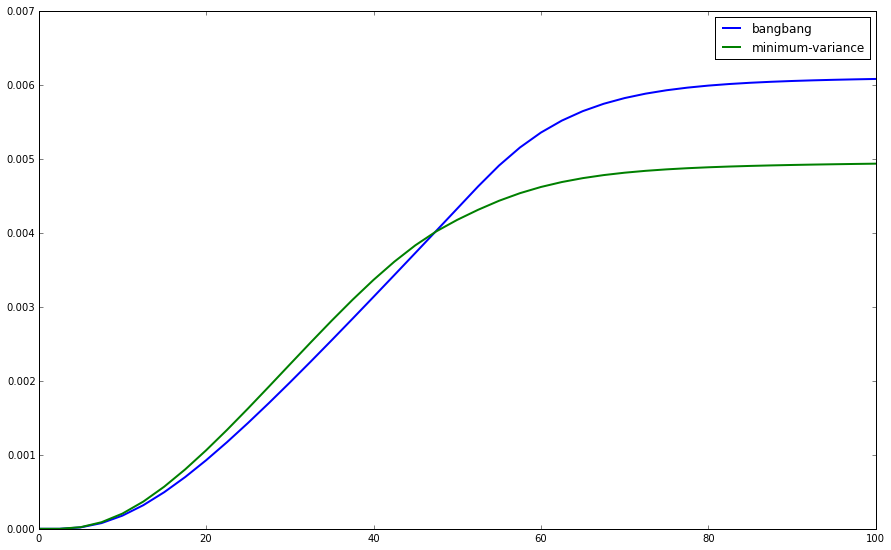

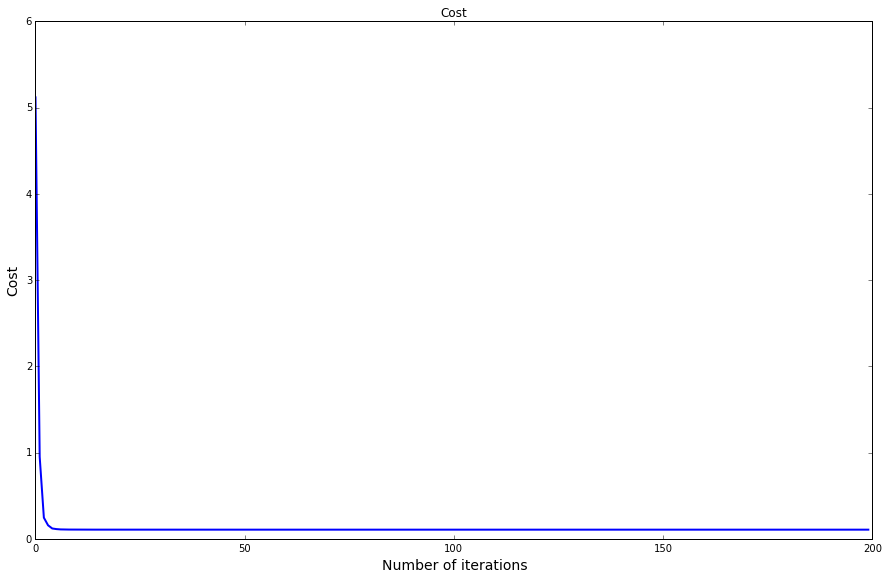

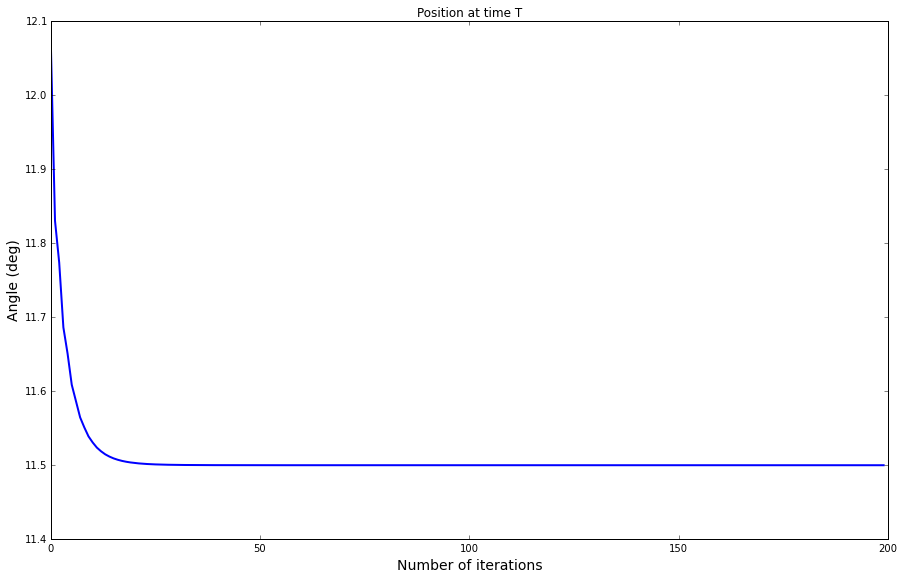

In [28]:
all_plots(record, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt, m.xT, m.v)

In [29]:
m = MinimumVarianceControl(dt = 0.0025, k = 0.0005, xT = np.array([10,0]), n_iter = 500000,record_each = 25000, eta=800000, v=40.)
u,record=control_learning(dt = 0.0025, k = 0.0005, xT = np.array([10,0]), n_iter = 500000, record_each = 25000, eta=800000, v=40.)

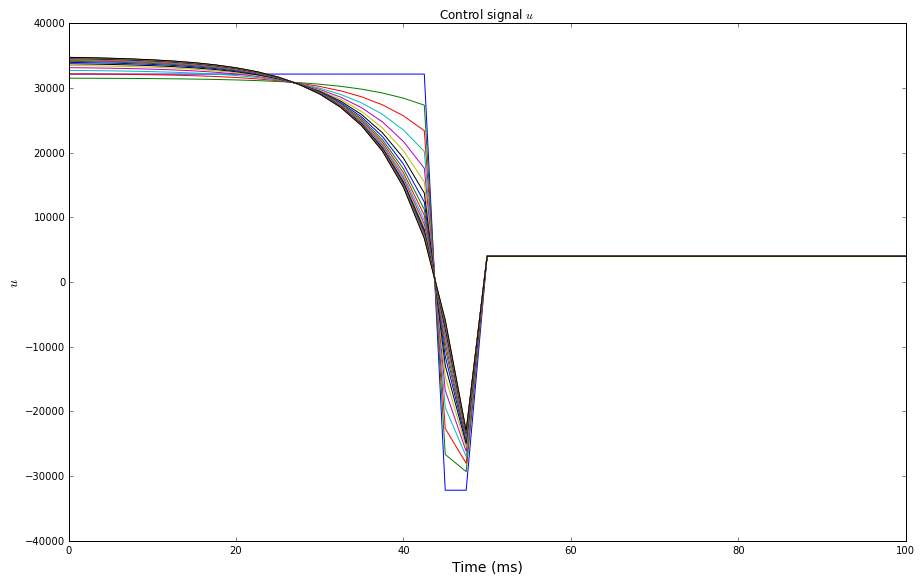

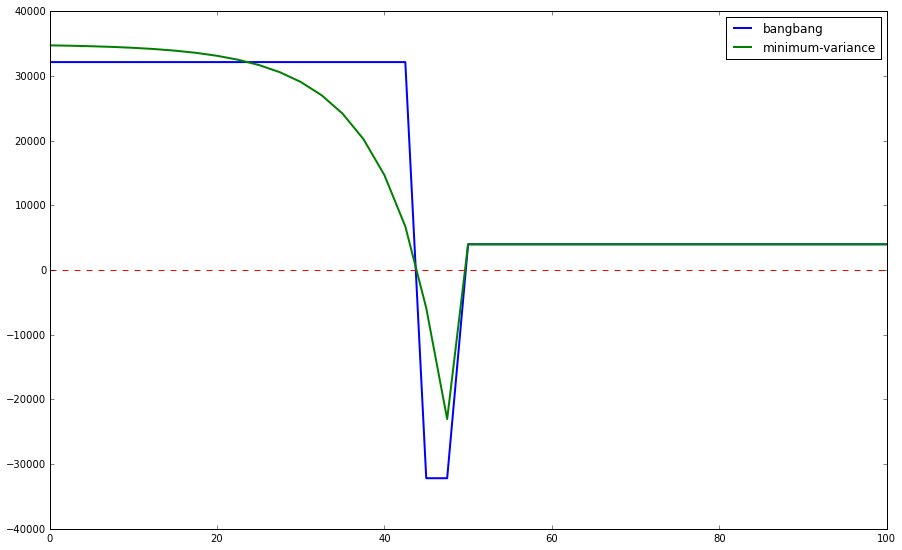

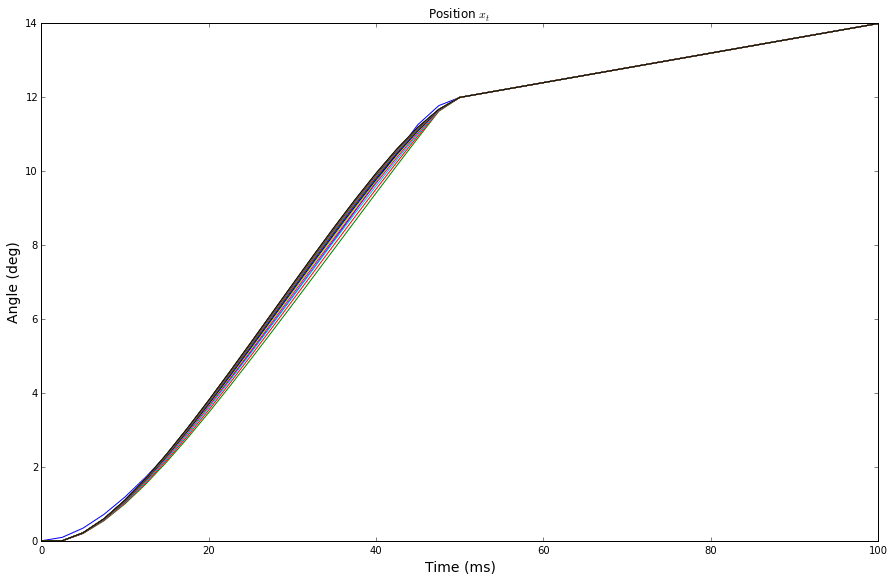

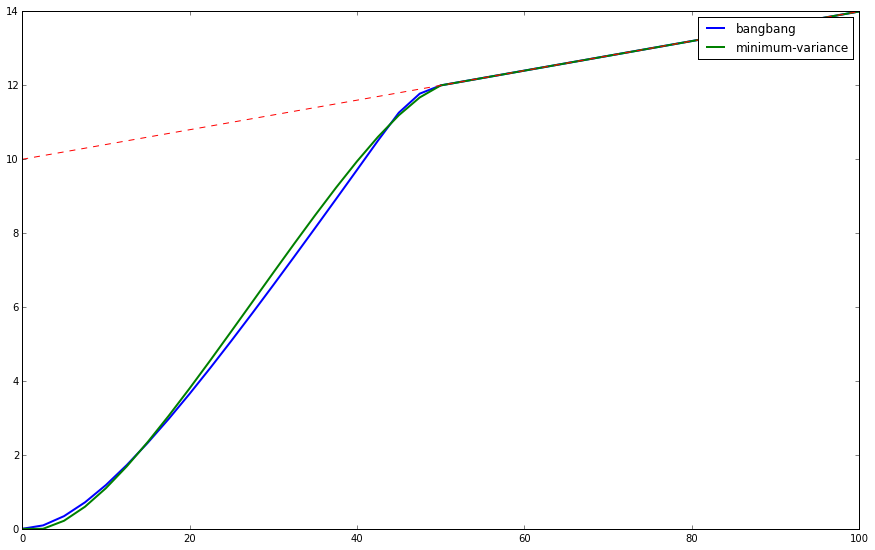

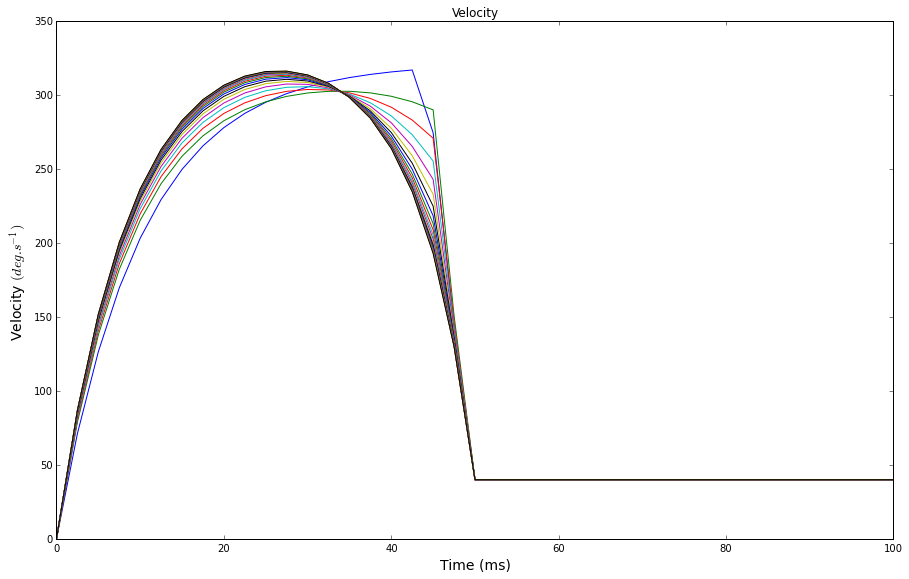

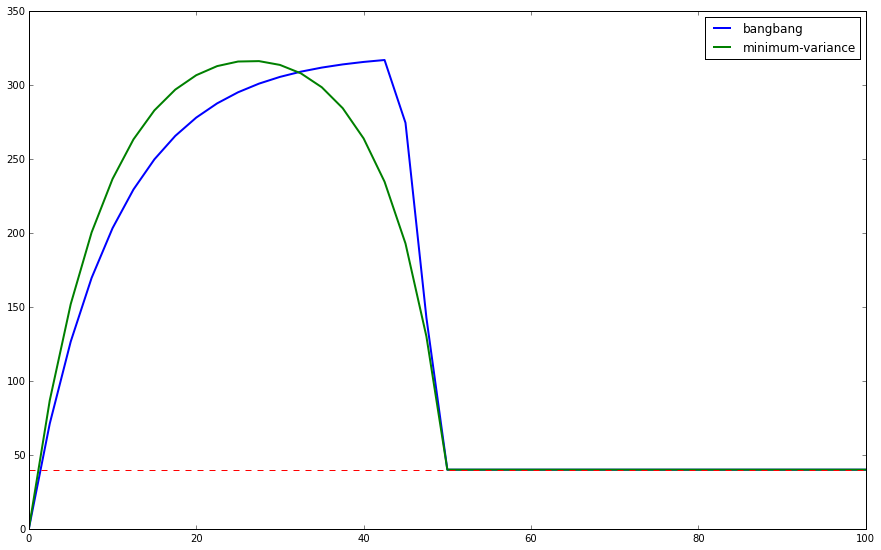

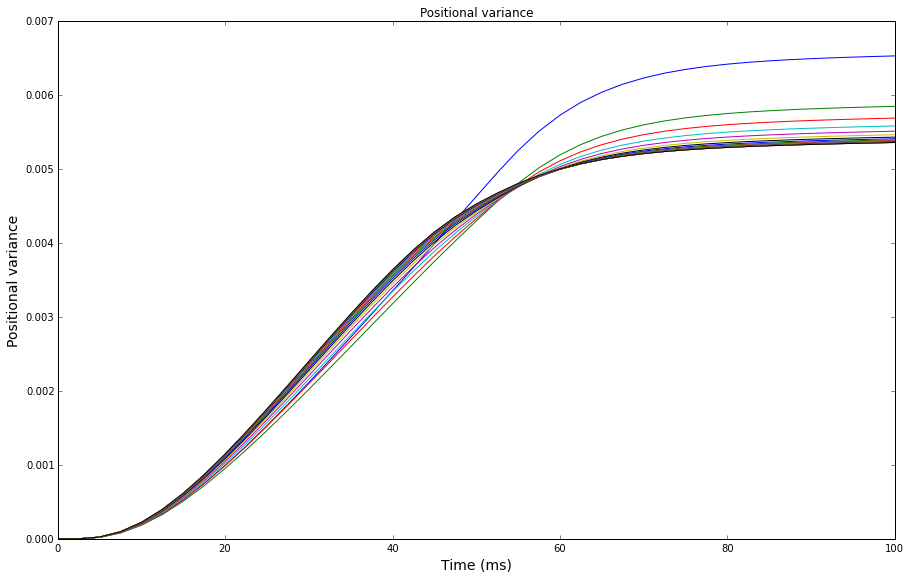

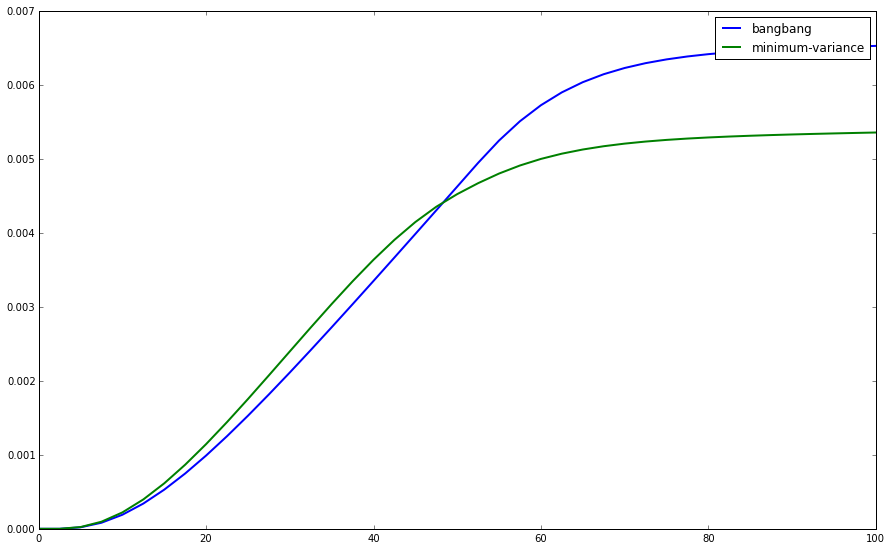

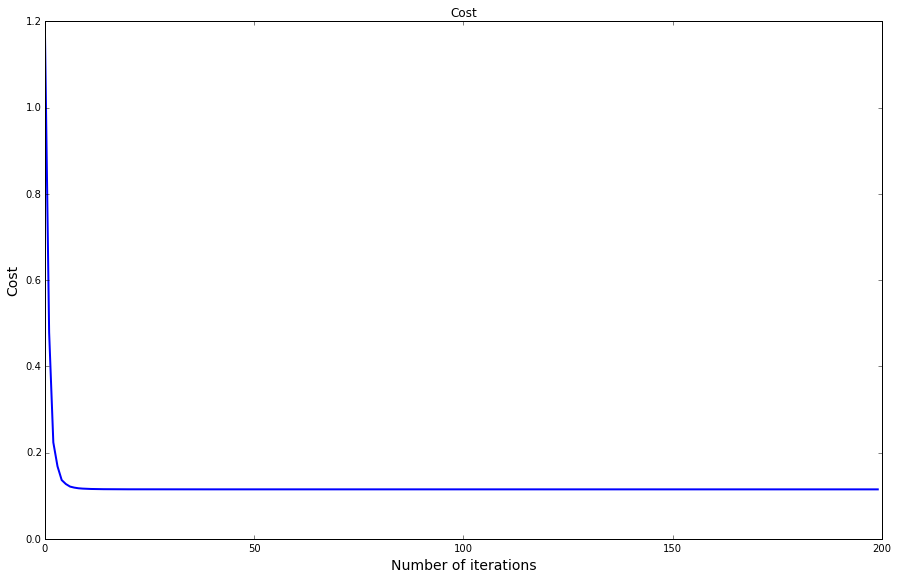

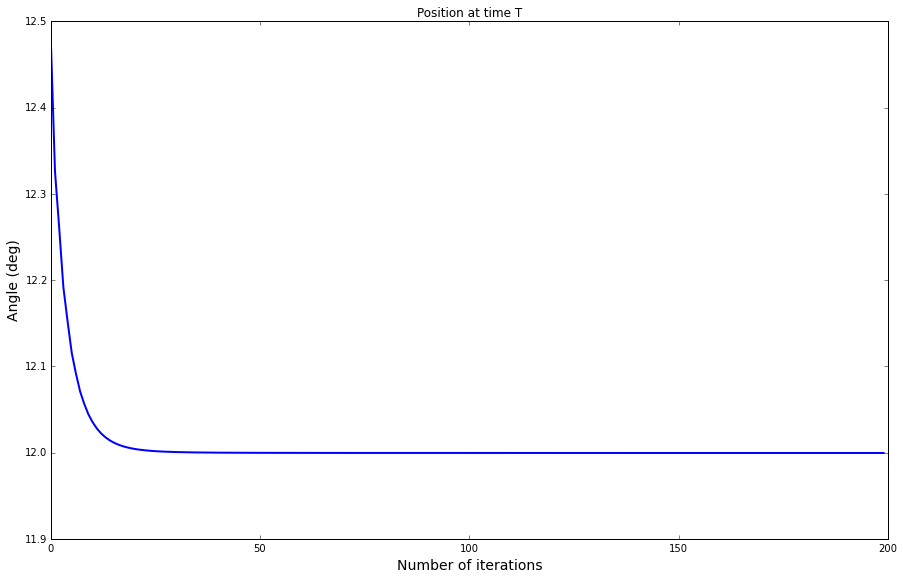

In [30]:
all_plots(record, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt, m.xT, m.v)